# MMD 2024, Problem Sheet 4

Group: Daniela Fichiu, Aaron Maekel, Manuel Senger

# Exercise 1



### a)

The probability that one machine doesnt fail during the time T is $1-p$, so the probability that all machines dont fail is $(1-p)^n$. The probability that at least one machine fails is the complement of this, so $1-(1-p)^n$.

### b)
Since there are two outcomes and the machines are independent, we  can use the binomial distribution. The probability that exactly k machines fail is given by the binomial distribution: $P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$.

### c)
If we look at all the possible outcomes of the machines, we get $\sum_{k=0}^{n} \binom{n}{k} p^k (1-p)^{n-k} = 1$. This is because the sum of all probabilities of all possible outcomes is 1. This already almost looks like the formula we got, except for the k=0 case. We know from previously that for k=0 this is $(1-p)^n$, so we can rewrite the formula as $\sum_{k=1}^{n} \binom{n}{k} p^k (1-p)^{n-k} + (1-p)^n = 1$. Therefore we see that $p_1 + p_2 + ... + p_n = \sum_{k=1}^{n} \binom{n}{k} p^k (1-p)^{n-k} = 1 - (1-p)^n$.

# Exercise 2

**MD5**: Produces a 128-bit hash. Though fast, it's insecure for password storage due to vulnerability to brute-force attacks.

**SHA-256**: Part of the SHA-2 family, it generates a 256-bit hash and is slower than MD5, making it more secure for hashing passwords.

**Rainbow Table**: A precomputed table for reversing cryptographic hash functions, used to crack password hashes. It's a time-memory trade-off, as it requires a lot of storage but speeds up the cracking process.

**Salt**: Adding random data to the input of a hash function to guarantee unique hashes for the same input. It prevents hash collisions and rainbow table attacks.

# Exercise 3



### a)
The Java Class HashMap extends the Class AbstractMap and implements the interface Map. It gets K - the type of keys maintained by the map - and V - the type of mapped values - as parameters. The class has a default constructor that creates an empty HashMap with the default initial capacity (16) and load factor (0.75). The capacity is the number of bucktes in the hash table and the load factor is a measure of how full the has table is allowed to get before its capacity is automatically increased. 

### b)
2. Adding a New <key, value> Pair to the Map

When a new key-value pair is added, the process follows these steps:

**Compute Hash:**
The hash code of the key is calculated using the key.hashCode() method, and then a secondary hashing function is applied to reduce collisions. This hashed value is used to determine the index of the bucket where the entry will be stored.

**Locate the Bucket**:
    The index of the bucket is determined by applying the modulus operation to the hash value and the current number of buckets: index = hash % numberOfBuckets.

**Check for Collisions**:
    No Collision: If the bucket is empty, a new Node with the key-value pair is created and placed at the corresponding index in the array.
    Collision: If the bucket already contains a Node, a collision has occurred. The new entry is added to the linked list (or balanced tree) at that bucket. If there is a list of nodes with the same hash value, the new Node is added at the head or end of the list (depending on the implementation)

### c)
**Compute Hash:**

The hash code of the search key is computed using the key.hashCode() method, and the index of the corresponding bucket is found using the formula index = hash % numberOfBuckets.
**
Locate the Bucket:**

The bucket at the computed index is accessed.

**Search for the Key:**

If there is only one entry in the bucket (i.e., no collision), the key-value pair is returned directly.
If there are multiple entries (i.e., a collision), the map will iterate through the linked list (or balanced tree) of Node objects at that bucket.
    The map will compare the search key with the keys of the nodes in the list using the equals() method.
    If a matching key is found, the corresponding value is returned.
    If no matching key is found in the list, the method returns null.


# Exercise 4

**Task:** Suppose you have to design/implement hash functions for a Bloom filter algorithm. Pro-
pose 3 hash functions which are as independent from each other as possible and briefly
justify your choice.

**Solution:**

1. Take all numbers at indices divisible by 3, sum them up, and divide them by 17.
2. Take all numbers at indices divisible by 3 with remainder 1, sum them up, and divide them by 17.
3. Take all numbers at indices divisible by 3 with remainder 2, sum them up, and divide them by 17.

# Exercise 5

Consider a Bloom filter with a bit array of $n = 5$ bits.

a) **Task:** Compute the probability that a random element gets hashed by a hash function to
a given bit in the bit array by using the probability formula from Lecture 5 (slide
Analysis: Throwing Darts (2)). Explain your answer.

**Solution:** Since we are working with a single element, we set $m = 1$. Using the formula $1 - (1 - 1/n)^m$ with $n = 5$ and $m = 1$, we get $20\%$.


b) **Task:** Now we want to use the following hash functions (k = 2):
- $h_1(x) = x \text{ mod } 5$,
- $h_2(x) = 2 · x + 3 \text{ mod } 5$.


Is every bit equally likely to be hit by one of the two hash functions? Suppose the
numbers 4 and 1 are in the set that we want to find with the filter. Show the state
of the bit array after you apply the hash functions to these numbers.

**Solution:**
- Array after $h_1$ `[0, 1, 0, 0, 1]`
- Array after $h_2$ `[1, 1, 0, 0, 0]`
- Final bit array   `[1, 1, 0, 0, 1]`



c) **Task:** Consider again the hash functions and the bit array state as in Part b). How likely is it
for a number in the stream to be a false positive? Use the false positive probability
formula from Lecture 5 (slide Bloom Filter -- Analysis). Explain your answer.

**Solution:** Using the formula $(1 - (1 - 1/n)^{km})^{k}$ with $k = 2$, $m = 2$ and $n = 5$ gives us $(1 - 0.8^{4})^{2} \approx 50\%$.

# Exercise 6

Consider the Bloom filtering technique and the set of keys S with m members. Assume
that you can control the size n of the bit array (bitset) used in the filter (n ≥ m) in steps
m/8.

a)
**Task:** 
Plot the optimal values of the number of hash functions k (as integers) for n =
m, 2m, . . . , 20m. Describe your observations, if any

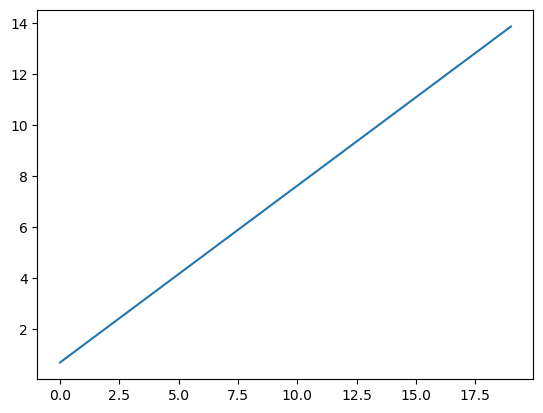

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nmesh= np.arange(1,21)
plt.plot(Nmesh * np.log(2))

the optimal k is growing proportional to the ratio n/m

b)

**Task:**

Assume that you want to minimize the size n (which drives up your memory cost) for
a given upper bound b on the expected false positive probability. Determine the
optimal values for n (and so k) under this objective for b1 = 0.01, b2 = 0.005, and
b3 = 0.001. Also state the (expected) false positive probability for each of these
parameter combinations. Explain your approach and explain why you do not need
to know the actual value of m.

**Solution:**

We look at the ratio n/m instead of n, as this can be used to calculate the correct k and the false positive probability.
We will search through a grid with step size 1/8.

In [23]:
Nm_mesh = np.arange(1,20,1/8)
Mn_mesh = 1/Nm_mesh
kopt = np.maximum(np.round(Nm_mesh * np.log(2)),np.ones((len(Nm_mesh))))

b = (1 - np.exp(-kopt*Mn_mesh))**kopt
for limit in [0.01,0.005,0.001]:   
    print("-----------------------")
    print("b=",limit)
    indx= np.where(b < limit)[0][0]
    print("n/m ratio", Nm_mesh[indx])
    
    
    print("false positive Probaility",b[indx])

-----------------------
b= 0.01
n/m ratio 9.625
false positive Probaility 0.009842603536832032
-----------------------
b= 0.005
n/m ratio 11.125
false positive Probaility 0.004782467206562176
-----------------------
b= 0.001
n/m ratio 14.5
false positive Probaility 0.0009429340108142648


# Exercise 7

**Task:**
Consider again the Bloom filtering technique. Prove that the optimal number kopt of hash
functions for given size n of the bitset and a given number m of keys is kopt = n/m ln(2)
(as claimed in the Lecture 5, slide Bloom Filter – Analysis (2)).
**Solution:**
We can see in the graph from Lecture 5, slide Bloom Filter – Analysis (2), that the shape of the probability curv implies  that there is one k which minimizes the probability of false positives.if $k_opt = n/m*ln(2)$ is indeed this minimum, then it solves the following minimization problem.

$k_{opt} = min:(1 - e^{-km/n})^{k}$ 

We throw the ln function on it:

$min: ln((1 - e^{-km/n})^{k}) = k * ln((1 - e^{-km/n}))  $
This is solved by differentiating the objective and setting it equal to 0:

(I) $ 0 = ln((1 - e^{-km/n})) + k * (m/n)*e^{-km/n}/(1 - e^{-km/n}) $

If we input $kopt= n/m*ln(2)$ on the rhs then we get:

$ ln((1 - e^{-n/m*ln(2)*m/n})) + n/m*ln(2) * (m/n)*e^{-n/m*ln(2)*m/n}/(1 - e^{-n/m*ln(2)*m/n}) $

$=ln((1 - e^{-ln(2)})) + ln(2) * *e^{-ln(2)}/(1 - e^{-ln(2)}) = ln(1-0.5) + ln(2)*0.5/(1-0.5) = ln(1/2)+ln(2) = 0 $

We thus know that kopt is a minimum.




# Exercise 8

**Task:** 

Suppose we have a stream of tuples with the schema Grades(university, courseID,
studentID, grade). Assume universities are unique, but a courseID is unique only
within a university (i.e., different universities may have different courses with the same
ID, e.g., “IPI”) and likewise, studentIDs are unique only within a university (different
universities may assign the same ID to different students). Suppose we want to answer
certain queries approximately from a 1/20th sample of the data. For each of the queries
below, indicate how you would construct the sample. That is, tell what the key attributes
should be.

a)
**Task:** 
For each university, estimate the average number of students in a course.

**Solution:**
our key is the course,and we sample 1/20th of all courses from each university and pick all the students there,thus building the mean from less courses, but the courses have precise data about the amount of students.

b)
*Task:**
Estimate the fraction of students who have an average grade of 2.0 or better.

**Solution:**
Our key is students

c)
**Task:**

Estimate the fraction of courses where at least half of the students got the grade 1.7
or better

**Solution:**

our key should be (uni,courses).




# Exercise 9

a) **Solution:** Yes, the output is the expeced one, i.e., the words along
with their counts. The words are also split on white space.

b) **Solution:** In this case, the sentence was sent 130 times instead of only once.
130 new rows were created, with approx. 20 rows processed
per second. A rows contais 10 characters, i.e., 10 bytes.
Therefore, the throughput is 200 bytes/second.